In [1]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16, 5

In [2]:
#для визуализации данных, а не обучения, лучше подойдет необработанный датасет
twitch_df = pd.read_csv('../data/twitch_data.csv')
twitch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Построим график зависимости Stream time от Followers gained. По оси x - Stream time, по оси y - среднее значение Followers gained.

<AxesSubplot:xlabel='Average viewers'>

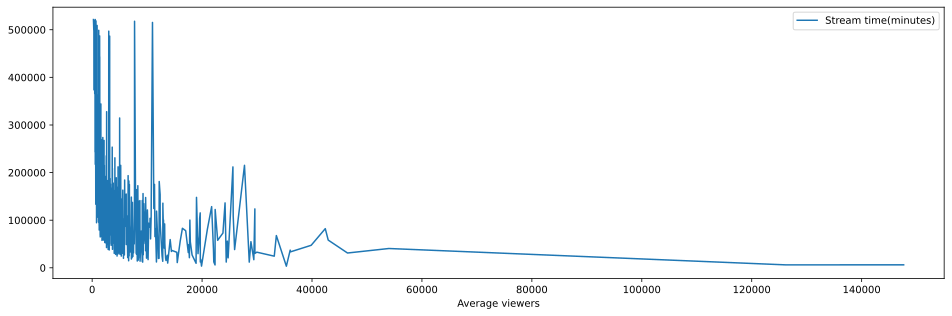

In [3]:
avg_viewers_df = twitch_df[['Stream time(minutes)'] + ['Average viewers']]
avg_viewers_df.groupby('Average viewers').mean().plot()

Из этих данных можно понять, что если стример популярен (имеет большое среднее число зрителей), он стримит достаточно мало, зачастую меньше, чем 100000 минут в год. Возможно это связано с тем, что не особо популярные стримеры стараются за счет частого проведения трансляций поднять себе статистику, в то время как популярные стримеры имеют свою фанбазу и могут не беспокоиться за число зрителей, оно всегда будет на высоте. Однако если копнуть глубже, то если в году всего лишь 525600 минут, то как некоторым стримерам удается стримить в год больше, чем 500000 минут ? Поискав один из каналов, имеющих подобную статистику, я пришел к выводу, что это каналы, показывающие фильмы, тв-шоу и тому подобные передачи, то есть словно телевизионная программа, так же работают почти 24/7. Это объясняет не такое большое количество средних зрителей, данные каналы - нишевые.

In [4]:
cols = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained']
sns_plot = sns.pairplot(twitch_df[cols])

Можно заметить, что у бол-ва стримеров показатель Average viewers не поднимается выше 50000. Followers gained у бол-ва стримеров не поднимается выше 2 млн. Views gained у бол-ва стримеров не поднимается выше 50 млн. Так же видно очевидную линейную зависимость между количеством подписчиков и количеством заработанных подписичков - чем больше стример зарабатывает подписичков, тем их, очевидно, больше. Показатель минут стрима, которые посмотрели зрители, у большинства стримеров не поднимается выше 2 млрд.

x:\programs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Followers', ylabel='Density'>

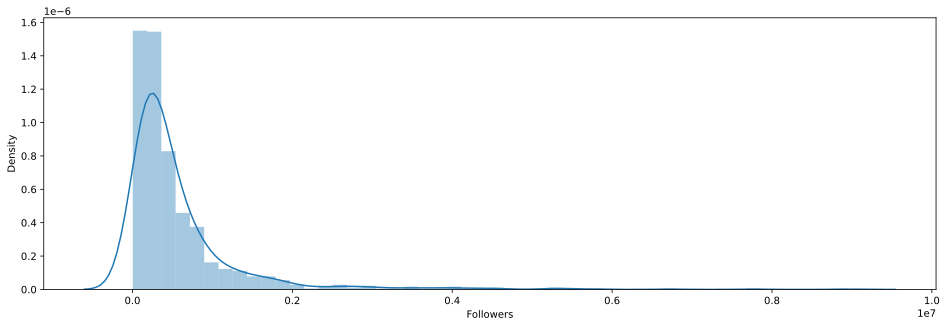

In [5]:
sns.distplot(twitch_df.Followers)

По данной гистограмме можно увидеть, что количество стримеров с ростом количества подписичиков уменьшается, по понятным причинам, только некоторым стримерам удается стать популярными. Большинство стримеров расположилось на отметке до ~400 тысяч подписчиков. Больше 1 млн. подписчиков имеется у достаточно малого количества стримеров.

<AxesSubplot:xlabel='Followers', ylabel='Language'>

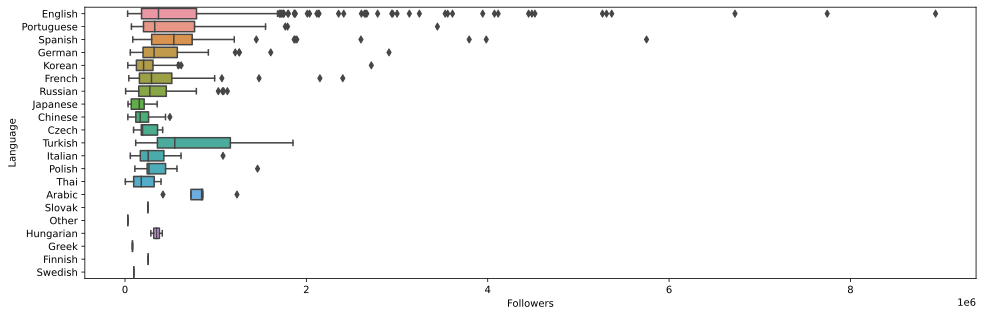

In [6]:
langs = twitch_df['Language'].value_counts().sort_values(ascending = False).index.values
sns.boxplot(y="Language", x="Followers", data=twitch_df[twitch_df['Language'].isin(langs)], orient="h")

Из данной инфографики следует, что у турков в среднем больше всего подписчиков, однако достаточно много единичных случаев стримеров, ведущих трансляции на английском, у которых огромное количество подписчиков. Но по среднему показателю подписчиков трансляции на английском наравне с трансляциями на португальском и испанском.

<AxesSubplot:xlabel='Mature', ylabel='Language'>

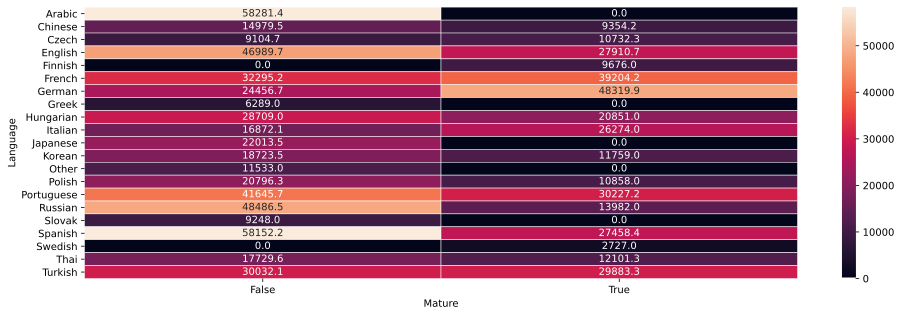

In [7]:
lang_mature_total = twitch_df.pivot_table(
                        index='Language', 
                        columns='Mature', 
                        values='Peak viewers', 
                        aggfunc=np.mean).fillna(0).applymap(float)
sns.heatmap(lang_mature_total, annot=True, fmt=".1f", linewidths=.5)

Из этой таблицы можно узнать то, что трансляции на русском, английском, испанском и многих других языках, не имеющие метки 18+, имеют в среднем намного больший пик зрителей, чем трансляции, имеющие подобную метку. В то же время трансляции на немецком, французском, итальянском языках собирали больший пик зрителей с меткой 18+. При этом можно заметить, что например стримов на арабском или японском с меткой 18+ нет в данных, равно как стримов на шведском или финнском без метки 18+.